## 1.0 | Exploratory Data Analysis

This document is intended to analyze the relationship between college defense and NBA defense. The two most obvious defensive statistics available are steals and blocks. Personal fouls are another component to consider particularly in relation to players who achieve a high level of steals and blocks. Personal fouls can be thought of as a failed attempt to achieve one or the other (some but not all of the time). 

### 1.1 Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import distfit
from sklearn.linear_model import LinearRegression

os.chdir('C:\\Users\\David\\OneDrive')
from utils.graphs import plot_scatter, corr_chart,regression_results
os.chdir('C:\\Users\\David\\OneDrive\\Projects\\nba-draft-player-analysis')
#read college data
df = pd.read_csv('data/modeling_data.csv')
df = df[df['steals_per_40']!=np.inf]

### 1.2 Steals

Steals, both college and nba level, display a similar distribution of near lognorm. Using distfit below confirms this to be the case. Comparing the correlation between non-transformed and log-transformed values shows the non-transformed have a slightly stronger correlation coefficient. This will be good to keep in mind for modeling as linear regression tend to perform better on response variable that follow a normal distribution. 

It is also apparent that steals have some correlation with position and height. It makes intuitive sense that a guard (which tends to be a shorter player) would have more opportunities to play on the perimeter and generate steals. As the game has evolved with more perimeter play and stretch forwards, I would suspect forwards have more opportunity to get steals now than they did five or ten years ago. Therefore, I looked into any trends by year and it doesn't look like there is much of a trend.

A simple univariate analysis shows that a coefficient of .54 can be applied to each college steal per 40 stat (along with the .59 y-intercept) to predict nba steals per 40. A college steals per 40 of 3 would equal (.59 + (3*.54)) 2.2 nba steals per 40. Therefore, a player can expect to make 75% of the steals they made in college in the NBA. 

Text(0.5, 1.0, 'Career College Steals per 40')

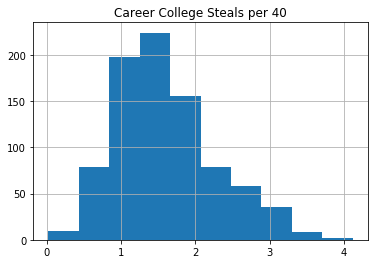

In [2]:
df.steals_per_40.hist()
plt.title('Career College Steals per 40')

Text(0.5, 1.0, 'NBA Steals per 40')

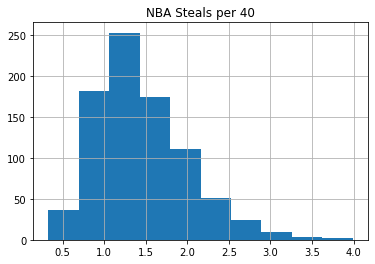

In [3]:
df.nba_steals_per_40.hist()
plt.title('NBA Steals per 40')

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.7074598] [loc=1.448 scale=0.549] 
[distfit] >[expon     ] [RSS: 4.1958964] [loc=0.330 scale=1.118] 
[distfit] >[pareto    ] [RSS: 6.1921485] [loc=-0.666 scale=0.996] 
[distfit] >[dweibull  ] [RSS: 0.5808644] [loc=1.424 scale=0.459] 
[distfit] >[t         ] [RSS: 0.5829055] [loc=1.401 scale=0.465] 
[distfit] >[genextreme] [RSS: 0.2765738] [loc=1.201 scale=0.434] 
[distfit] >[gamma     ] [RSS: 0.2830479] [loc=0.215 scale=0.239] 
[distfit] >[lognorm   ] [RSS: 0.2745547] [loc=-0.044 scale=1.398] 
[distfit] >[beta      ] [RSS: 0.2832698] [loc=0.223 scale=76489.494] 
[distfit] >[uniform   ] [RSS: 4.3450162] [loc=0.330 scale=3.660] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot summary..


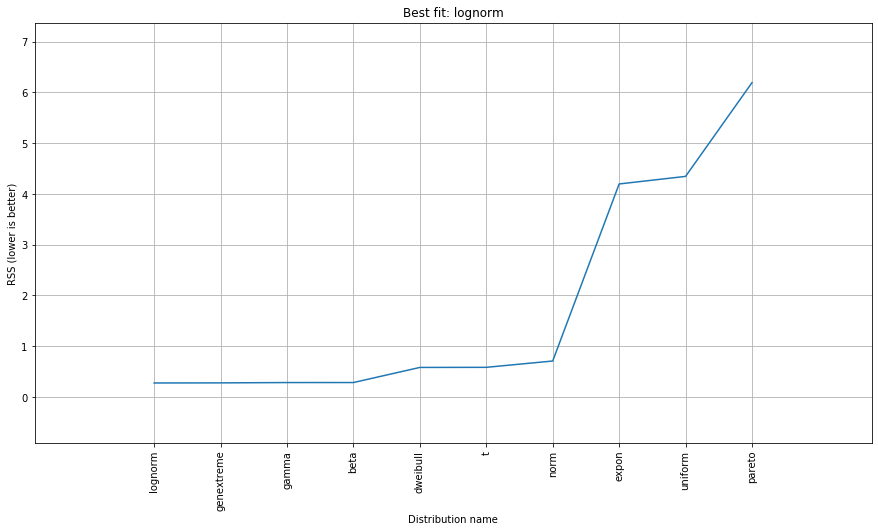

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a8d534e2b0>)

In [4]:
ds = distfit.distfit()
ds.fit_transform(df.nba_steals_per_40)
ds.plot_summary()

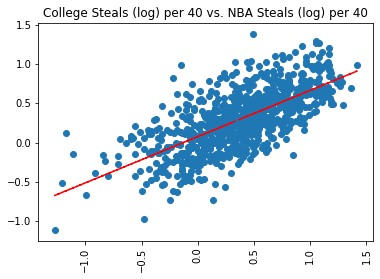

0.63 correlation coefficient


In [5]:
df['log_nba_steals_per_40'] = np.log(df['nba_steals_per_40'])
df['log_steals_per_40'] = np.log(df['steals_per_40'])

plot_scatter(df['log_steals_per_40'][df['log_steals_per_40']>-2],df['log_nba_steals_per_40'][df['log_steals_per_40']>-2],title='College Steals (log) per 40 vs. NBA Steals (log) per 40')
print('{} correlation coefficient'.format(np.corrcoef(df['log_steals_per_40'],df['log_nba_steals_per_40'])[1][0].round(2)))

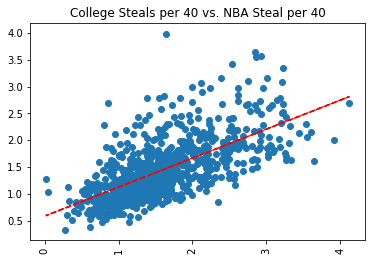

0.66 correlation coefficient


In [6]:
plot_scatter(df['steals_per_40'][df['steals_per_40']>-2],df['nba_steals_per_40'][df['steals_per_40']>-2],title='College Steals per 40 vs. NBA Steal per 40')
print('{} correlation coefficient'.format(np.corrcoef(df['steals_per_40'],df['nba_steals_per_40'])[1][0].round(2)))

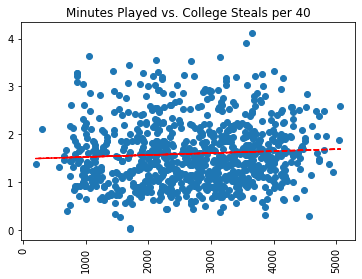

In [7]:
plot_scatter(df['minutes_played'],df['steals_per_40'],title='Minutes Played vs. College Steals per 40')

Text(0.5, 1.0, 'Boxplot of College Career Steals per 40 by Position')

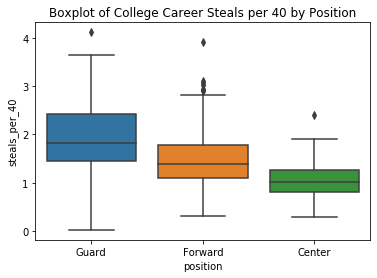

In [8]:
order = ['Guard','Forward','Center']
sns.boxplot(x = 'position', y = 'steals_per_40',data = df,order = order)
plt.title('Boxplot of College Career Steals per 40 by Position')

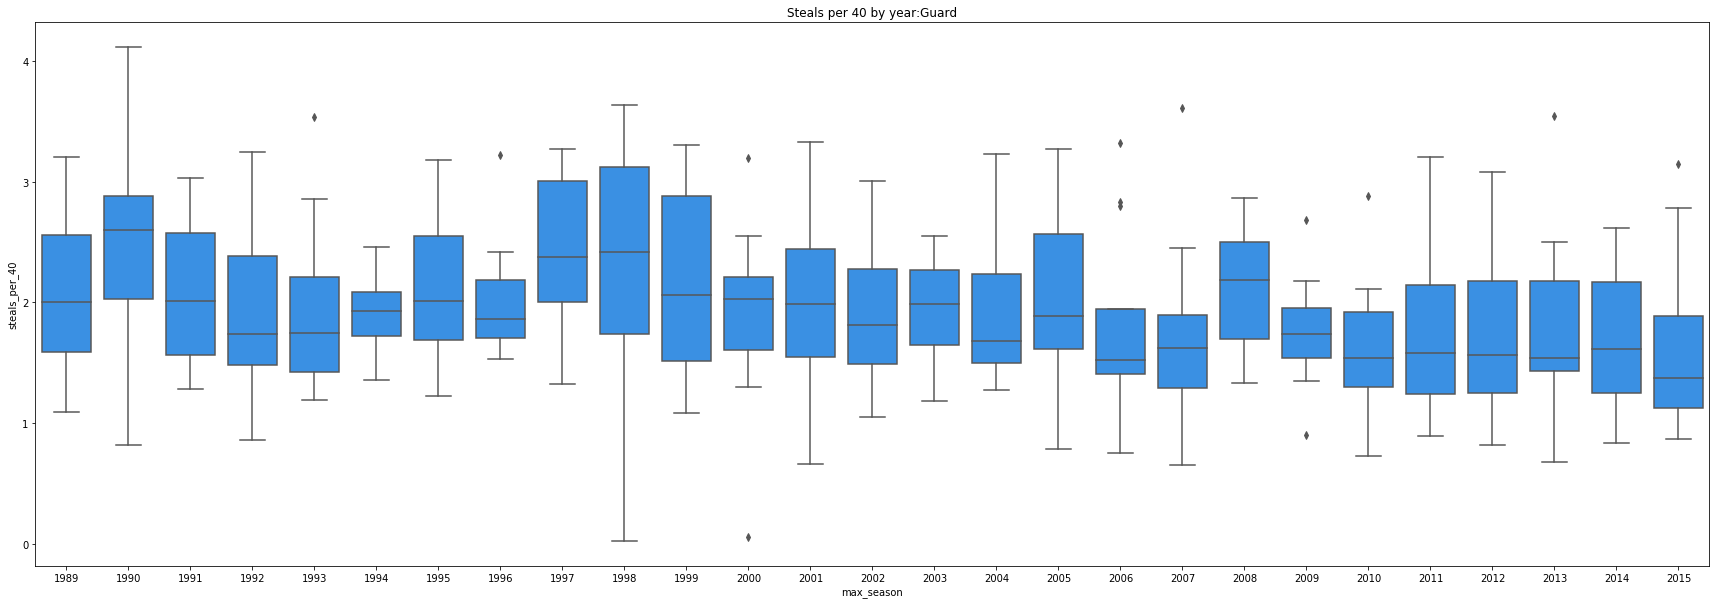

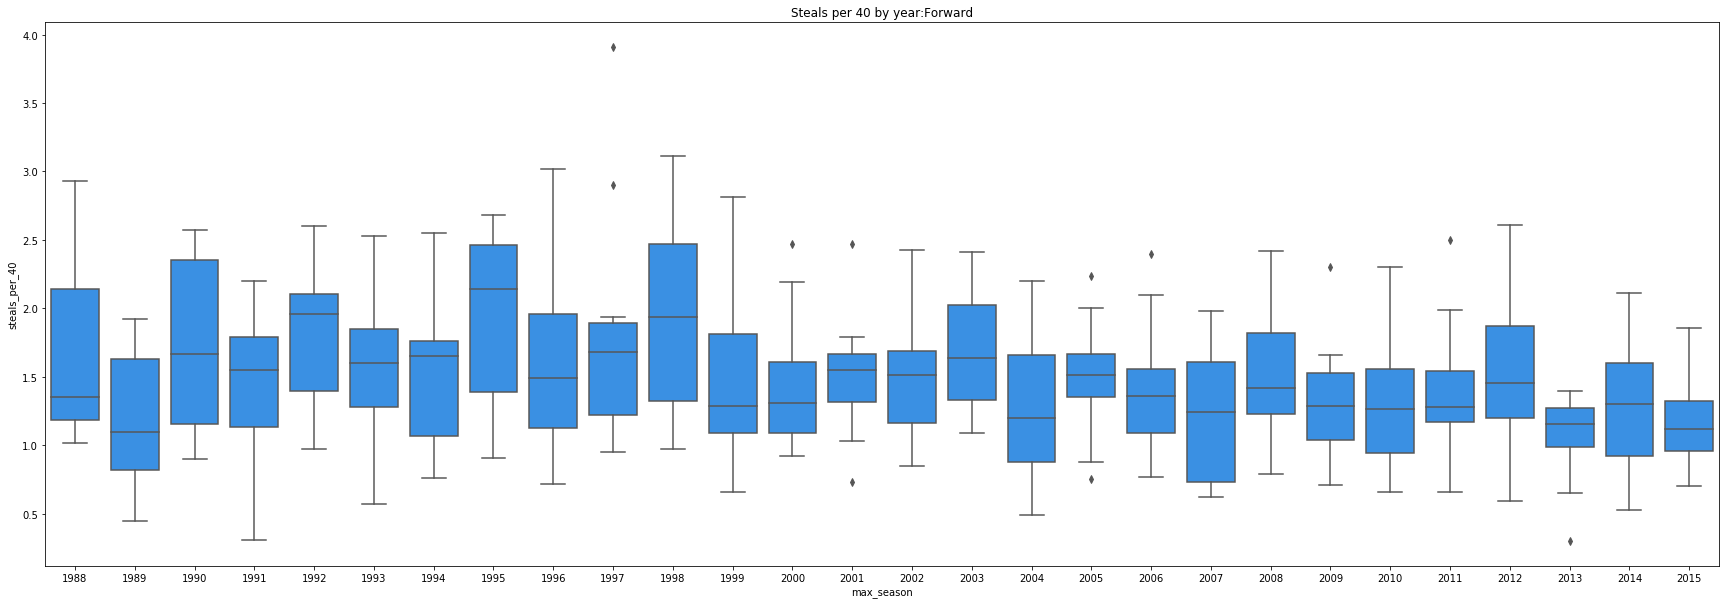

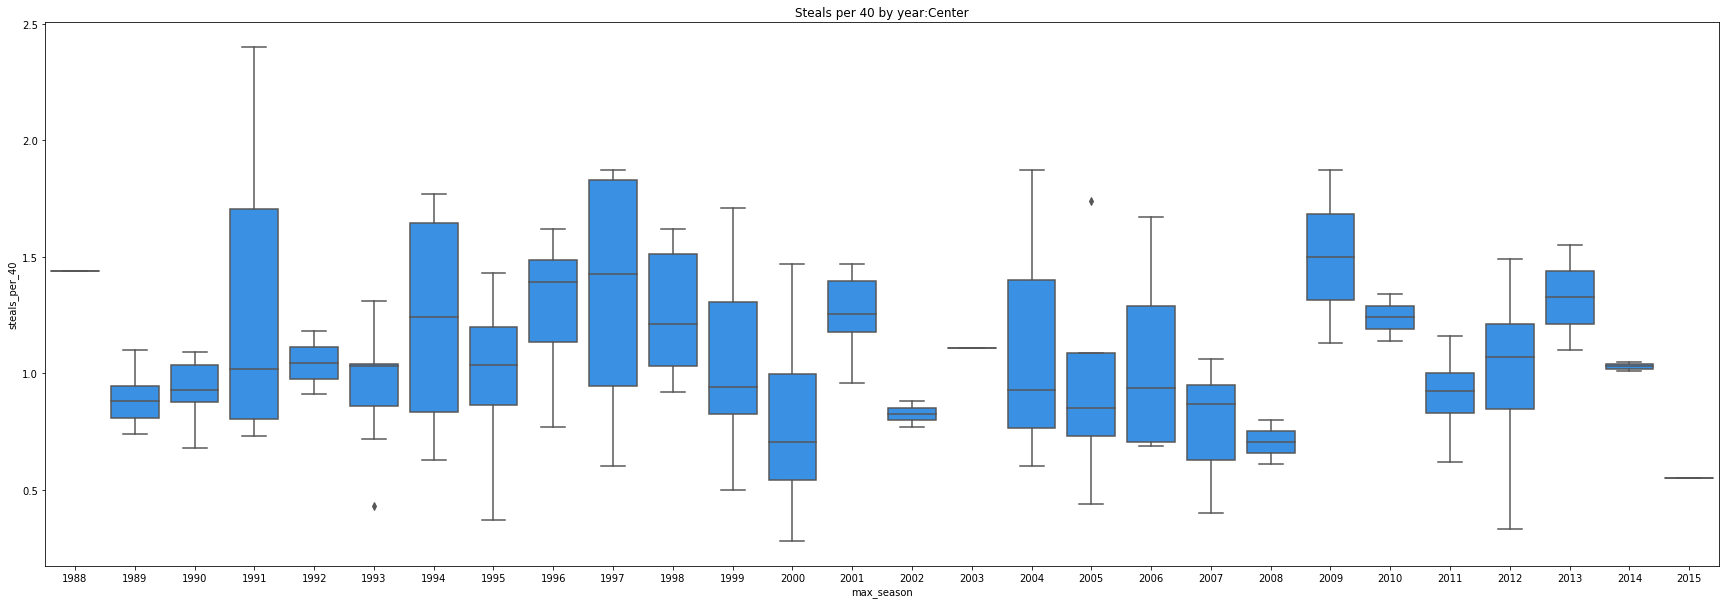

In [37]:
for i in ['Guard','Forward','Center']:
    plt.figure(figsize=(30, 10))
    plt.title('Steals per 40 by year:'+str(i))
    sns.boxplot(y='steals_per_40', x='max_season', 
                 data=df[df['position']==i].sort_values(by='max_season',ascending=True), 
                 color='dodgerblue')

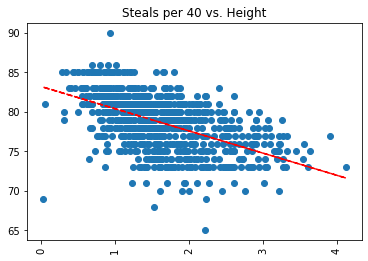

In [9]:
plot_scatter(df['steals_per_40'],df['height'],title='Steals per 40 vs. Height')

#### Sample Univariate Analysis

In [10]:
model = LinearRegression()
model.fit(np.array(df['steals_per_40']).reshape(-1,1),df['nba_steals_per_40'])
y_pred = model.predict(np.array(df['steals_per_40']).reshape(-1,1))

print('Steals Model')
print('--------------------------------------')
print('Coefficients:',model.coef_[0].round(2))
print('Intercept:',model.intercept_.round(2))

Steals Model
--------------------------------------
Coefficients: 0.54
Intercept: 0.59


### 1.3 Blocks

Blocks are similarly dstributed to steals, albeit with a stronger log norm distribution. Using a log transformation to both values, the relationship takes on a strong linear correlation. As expected, both height and position play a role in blocks. A taller player is likely to play Center and more likely to be in position to reject shots at the rim. 

Another univariate analysis shows that when translating blocks from college to the pros (sans log transformation), a player can expect 3 blocks per 40 in college to be (.15 + (.61*3)) 2 blocks per 40 in the NBA. A player can expect to make 66% of the blocks they made in college



Text(0.5, 1.0, 'Career College Blocks per 40')

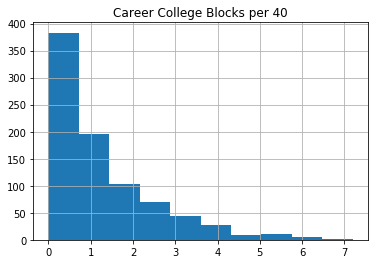

In [11]:
df.blocks_per_40.hist()
plt.title('Career College Blocks per 40')

Text(0.5, 1.0, 'NBA Blocks per 40')

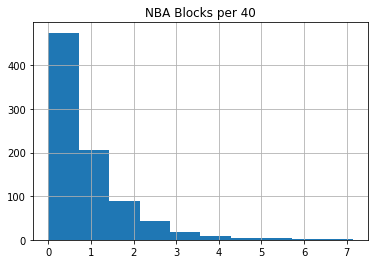

In [12]:
df.nba_blocks_per_40.hist()
plt.title('NBA Blocks per 40')

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 1.2979443] [loc=0.918 scale=0.885] 
[distfit] >[expon     ] [RSS: 0.4426931] [loc=0.000 scale=0.918] 
[distfit] >[pareto    ] [RSS: 1.1047937] [loc=-0.846 scale=0.846] 
[distfit] >[dweibull  ] [RSS: 0.6285942] [loc=0.570 scale=0.578] 
[distfit] >[t         ] [RSS: 0.6531123] [loc=0.621 scale=0.441] 
[distfit] >[genextreme] [RSS: 0.0731255] [loc=0.455 scale=0.382] 
[distfit] >[gamma     ] [RSS: 0.1964771] [loc=-0.001 scale=0.677] 
[distfit] >[lognorm   ] [RSS: 0.0373867] [loc=-0.029 scale=0.654] 
[distfit] >[beta      ] [RSS: 0.1973686] [loc=-0.001 scale=257905.991] 
[distfit] >[uniform   ] [RSS: 3.1010893] [loc=0.000 scale=7.140] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot summary..


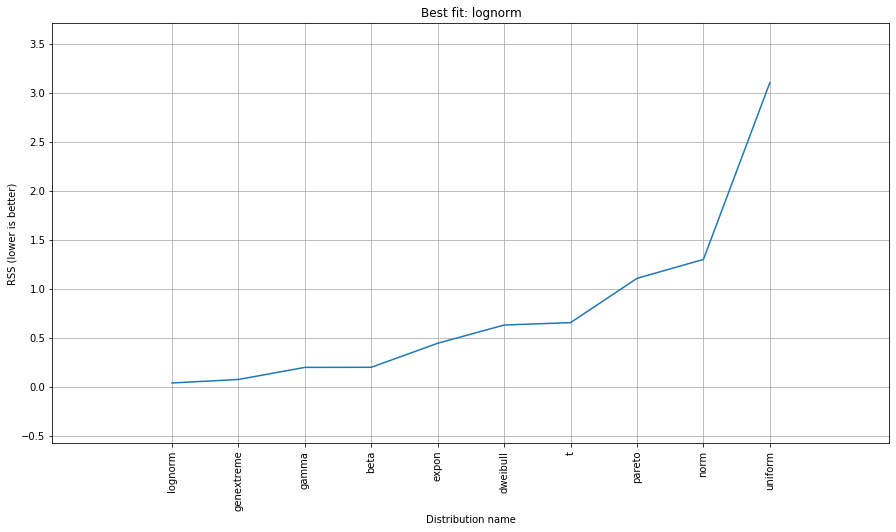

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a8d5cf6d30>)

In [13]:
ds = distfit.distfit()
ds.fit_transform(df.nba_blocks_per_40)
ds.plot_summary()

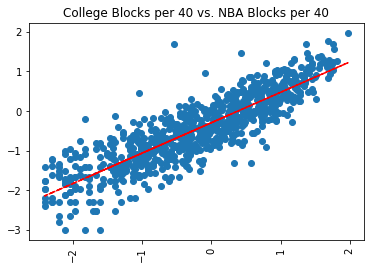

In [42]:
df['log_nba_blocks_per_40'] = np.log(df['nba_blocks_per_40'])
df['log_blocks_per_40'] = np.log(df['blocks_per_40'])

plot_scatter(df['log_blocks_per_40'][df['log_blocks_per_40']>-2.5],df['log_nba_blocks_per_40'][df['log_blocks_per_40']>-2.5],title='College Blocks per 40 vs. NBA Blocks per 40')

Text(0.5, 1.0, 'Boxplot of College Career Steals per 40 by Position')

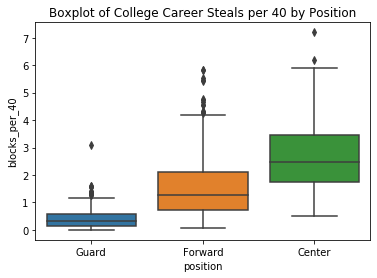

In [15]:
order = ['Guard','Forward','Center']
sns.boxplot(x = 'position', y = 'blocks_per_40',data = df,order = order)
plt.title('Boxplot of College Career Steals per 40 by Position')

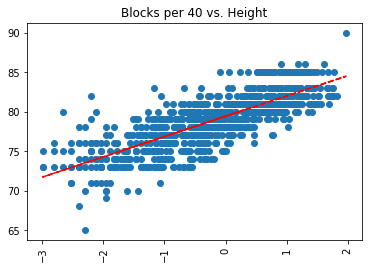

In [16]:
plot_scatter(df['log_blocks_per_40'][df['log_blocks_per_40']>-3],df['height'][df['log_blocks_per_40']>-3],title='Blocks per 40 vs. Height')

In [20]:
model = LinearRegression()
model.fit(np.array(df['blocks_per_40']).reshape(-1,1),df['nba_blocks_per_40'])
y_pred = model.predict(np.array(df['blocks_per_40']).reshape(-1,1))

print('Blocks per 40 Model')
print('--------------------------------------')
print('Coefficients:',model.coef_[0].round(2))
print('Intercept:',model.intercept_.round(2))

Blocks per 40 Model
--------------------------------------
Coefficients: 0.61
Intercept: 0.15
